In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv('Data/flights_cleaned.csv')

In [3]:
df.months

0         8
1         8
2         8
3         8
4         8
         ..
312788    8
312789    8
312790    8
312791    8
312792    8
Name: months, Length: 312793, dtype: int64

# Task 1

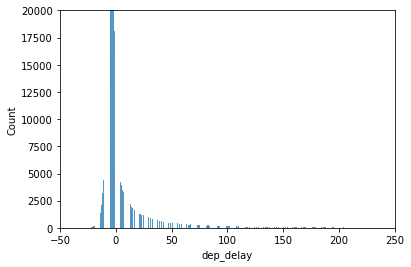

In [4]:
sns.histplot(df.dep_delay)
plt.xlim(-50, 250)
plt.ylim(0, 20000)
plt.show()

In [5]:
# Anderson-Darling test for normality

from scipy.stats import anderson

scipy.stats.anderson(df.dep_delay, dist='norm')

# The significance level below indicates the data is normally distributed.

AndersonResult(statistic=56214.537472699536, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

# Task 2: average/median monthly delay different during the year

C:\Users\Sujan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='months', ylabel='dep_delay'>

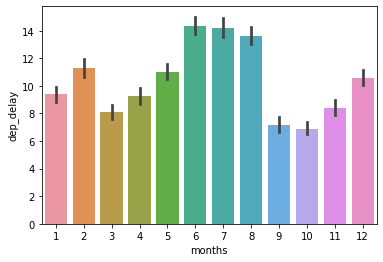

In [6]:
sns.barplot(df.months, df.dep_delay)

In [7]:
# Month 6,7,8 (June, July, Aug) has the highest delays.

# Task 3: # Does the weather affect the delay?

# Task 4: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [17]:
task4a = df.groupby(['dep_time'])['taxi_out'].mean()
task4a = pd.DataFrame(task4a)
task4a

,taxi_out
dep_time,
1.0,16.317073
2.0,17.208333
3.0,15.633333
4.0,19.351351
5.0,17.619048
...,...
2356.0,18.816327
2357.0,17.170732
2358.0,16.600000


In [18]:
df

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,...,cancelled,diverted,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,months
0,2018-08-20,UA,3656,"Raleigh/Durham, NC","Newark, NJ",1535,1533.0,-2.0,17.0,9.0,...,0.0,0.0,77.0,416.0,0.0,0.0,0.0,0.0,0.0,8
1,2018-08-20,UA,3723,"Denver, CO","Charlotte, NC",1000,955.0,-5.0,27.0,12.0,...,0.0,0.0,163.0,1337.0,0.0,0.0,0.0,0.0,0.0,8
2,2018-08-20,AA,4686,"Philadelphia, PA","Oklahoma City, OK",2115,2118.0,3.0,21.0,17.0,...,0.0,0.0,171.0,1261.0,0.0,0.0,0.0,0.0,0.0,8
3,2018-08-20,AA,4694,"Miami, FL","Key West, FL",2155,2149.0,-6.0,17.0,6.0,...,0.0,0.0,32.0,125.0,0.0,0.0,0.0,0.0,0.0,8
4,2018-08-20,AA,2366,"Chicago, IL","Atlanta, GA",1850,1856.0,6.0,23.0,6.0,...,0.0,0.0,92.0,606.0,0.0,0.0,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312788,2018-08-20,WN,1193,"Omaha, NE","Las Vegas, NV",1650,1642.0,-8.0,7.0,3.0,...,0.0,0.0,151.0,1099.0,0.0,0.0,0.0,0.0,0.0,8
312789,2018-08-20,WN,2299,"Ontario, CA","Denver, CO",635,635.0,0.0,8.0,8.0,...,0.0,0.0,104.0,819.0,0.0,0.0,0.0,0.0,0.0,8
312790,2018-08-20,WN,791,"Ontario, CA","Phoenix, AZ",2120,2117.0,-3.0,6.0,7.0,...,0.0,0.0,54.0,325.0,0.0,0.0,0.0,0.0,0.0,8
312791,2018-08-20,WN,1110,"Phoenix, AZ","Los Angeles, CA",1435,1435.0,0.0,36.0,5.0,...,0.0,0.0,53.0,370.0,0.0,0.0,0.0,0.0,0.0,8


C:\Users\Sujan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dep_time', ylabel='taxi_out'>

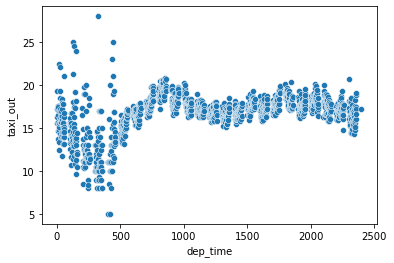

In [19]:
sns.scatterplot(task4a.index, task4a.taxi_out)


In [10]:
# above figure shows the change in taxi time during the day

In [28]:
task4b = df.groupby('arr_time')['taxi_in'].count()
task4b = pd.DataFrame(task4b)
task4b

,taxi_in
arr_time,
1.0,181
2.0,182
3.0,167
4.0,152
5.0,152
...,...
2356.0,189
2357.0,183
2358.0,170


(0.0, 900.0)

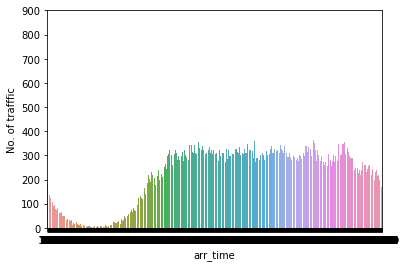

In [30]:
sns.barplot(y=task4b.taxi_in, x=task4b.index)
plt.ylabel('No. of trafffic')
plt.ylim(0,900)

In [ ]:
# During morning times, the traffic seem to be low but the taxi time is significantly more 
# compared to other times of the day when the traffic is high.

# Task 5: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [31]:
delay_caused_by_dep_delay = len(df[(df['dep_delay']>0) & df['arr_delay']>0 ])

In [32]:
total_arr_delay = len(df[df['arr_delay']>0])

In [33]:
per = (delay_caused_by_dep_delay / total_arr_delay)*100
print("On average percentage of arrival delays caused by departure delays:", round(per),'%')

On average percentage of arrival delays caused by departure delays: 95 %


In [34]:
df[(df['dep_delay']>0) & df['arr_delay']>0 ]['air_time'].mean()

113.4454138290123

In [35]:
df.air_time.mean()

107.9463527968604

In [ ]:
# Since average air_time during delays is more, airlines are not able to lower the delay during the flights

# Task 6: How many states cover 50% of US air traffic?

In [ ]:
df[['city','state']] = df['origin_city_name'].str.split(',', expand=True, n=2)

In [ ]:
task6 = df[df.city != 'ontario']
task6.head()

In [ ]:
state_US = task6.groupby(['state'])['state'].count().sort_values(ascending=False)
state_US.sum()

In [ ]:
state_US = state_US.head(8)


# This illustrates states with biggest air traffic that covers 50% air traffic.
# This is calculated manually to get 50% of 312793 (total flights in US)

In [ ]:
# Create Barplot

fig, axes = plt.subplots(figsize=(15,10))
sns.barplot(ax=axes, x=state_US.values, y=state_US.index)
axes.set_xlabel('Flights')
axes.set_ylabel('States')
axes.set_title('Flights Per State')

# Task 7: Test the hypothesis whether planes fly faster when there is the departure delay?

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
df['speed'] = df['distance']/df['air_time']

In [ ]:
delay = df[df['dep_delay']>0]['speed']
no_delay = df[df['dep_delay']<=0]['speed']

In [ ]:
ttest_ind(delay, no_delay)

In [ ]:
# Since, p value is greater than 0.05, we do not reject the null hypothesis.
# Therefore, planes do not fly faster when there is a deparure delay.

# Task 8: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [ ]:
df_8 = df.copy(deep=True)

In [ ]:
# created bin based on air_time as below.
# short = 0 - 90
# medium = 90 - 240
# long >= 240

#Bin by duration
short=df_8[df_8['air_time']<=90]
medium=df_8[(df_8['air_time']> 90) & (df_8['air_time']<=240)]
long=df_8[df_8['air_time']>=240]

In [ ]:
#Split into hours
# df['dep_time'] = df['dep_time'].astype(int)
# df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H:%M')
# df['dep_hr'] = df['dep_time'].dt.hour

In [ ]:
#Group and order values
duration_short=short.groupby(by=[short['dep_time']])['taxi_out'].count().sort_values(ascending=False)
duration_med=medium.groupby(by=[medium['dep_time']])['taxi_out'].count().sort_values(ascending=False)
duration_long=long.groupby(by=[long['dep_time']])['taxi_out'].count().sort_values(ascending=False)

In [ ]:
fig, ax=plt.subplots(figsize=(10, 10))
sns.barplot(x=short_flights.index, y=short_flights.values)
ax.set_title('Short Flights')
ax.set_xlabel('Hours')
ax.set_ylabel('Flights')

In [ ]:
fig, ax=plt.subplots(figsize=(10, 10))
sns.barplot(ax=ax, x=duration_med.index, y=duration_med.values)
ax.set_title('Medium Flights')
ax.set_xlabel('Hours')
ax.set_ylabel('Flights')
plt.savefig('Med_Flights.png')

In [ ]:
fig, ax=plt.subplots(figsize=(10, 10))
sns.barplot(ax=ax, x=duration_long.index, y=duration_long.values)
ax.set_title('Long Flights')
ax.set_xlabel('Hours')
ax.set_ylabel('Flights')
plt.savefig('Long_Flights.png')

# Task 9: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?
 

In [36]:
df_9 = df.copy(deep=True)

In [37]:
bussiest_airport = df_9.groupby('origin_city_name')['taxi_in'].count().sort_values(ascending=False).head(10)
bussiest_airport

origin_city_name
Chicago, IL              18740
Atlanta, GA              15595
New York, NY             11644
Dallas/Fort Worth, TX    11437
Denver, CO               11037
Los Angeles, CA           9967
Charlotte, NC             9756
Houston, TX               9443
Washington, DC            9086
Seattle, WA               7458
Name: taxi_in, dtype: int64

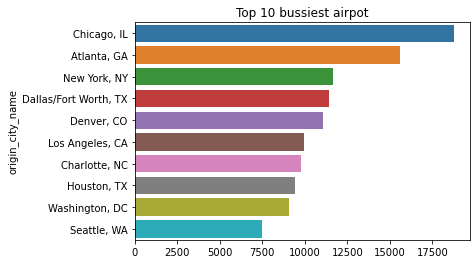

In [38]:
sns.barplot(x=bussiest_airport.values, y=bussiest_airport.index)
plt.title('Top 10 bussiest airpot')
plt.show()

In [40]:
pax = pd.read_csv('Data/rawdata_passenger.csv')

In [42]:
pax

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0.0,1.0,90500.0,276.0,0.0,0.0,0.0,175.0,66.0,30.0,...,US,United States,6,626,1,2015,7,1,L,DU
1,0.0,60.0,210000.0,803.0,795.0,0.0,0.0,94.0,2856.0,2376.0,...,US,United States,4,485,1,2015,7,1,L,DU
2,0.0,25.0,80000.0,194.0,190.0,0.0,0.0,96.0,1186.0,986.0,...,US,United States,4,416,1,2015,7,1,L,DU
3,0.0,20.0,64000.0,161.0,145.0,0.0,0.0,152.0,1311.0,1151.0,...,US,United States,4,416,1,2015,7,1,L,DU
4,0.0,13.0,41600.0,4.0,4.0,0.0,0.0,65.0,499.0,395.0,...,US,United States,4,416,1,2015,7,1,L,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117583,0.0,2.0,181000.0,551.0,392.0,0.0,0.0,3631.0,810.0,762.0,...,IE,Ireland,6,626,1,2015,7,8,L,IU
117584,0.0,1.0,315000.0,380.0,0.0,0.0,0.0,1471.0,198.0,186.0,...,US,United States,6,627,1,2015,7,3,L,IU
117585,0.0,4.0,362000.0,1105.0,934.0,0.0,0.0,4811.0,2544.0,2406.0,...,JP,Japan,6,626,1,2015,7,10,L,IU
117586,0.0,4.0,365000.0,1100.0,602.0,0.0,0.0,2709.0,1482.0,1386.0,...,US,United States,6,626,1,2015,7,6,L,IU


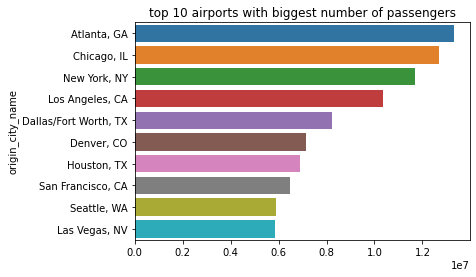

In [41]:
biggest_pax = pax.groupby('origin_city_name')['passengers'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=biggest_pax.values, y=biggest_pax.index)
plt.title('top 10 airports with biggest number of passengers')
plt.show()

In [ ]:
# Yes biggest number of passengers travelled through these biggest airports

In [ ]:
big_airports = ['Chicago, IL','Atlanta, GA','New York, NY','Dallas/Fort Worth, TX',
                'Denver, CO','Los Angeles, CA','Charlotte, NC','Houston, TX',
                'Washington, DC','Seattle, WA'
               ]

In [ ]:
# for loop for calculating total number of passengers in the above list of top 10 airports

count = 0

for i in big_airports:
    count += pax[(pax['origin_city_name']==i)]['passengers'].sum()

print("total passengers in top airports:",int(count))    

In [ ]:
print("These 10 airports cover",int(round((count)/pax.passengers.sum())*100),"% of the total traffic")